### 2015 & 2017 U.S. Census Demographic data

I have choosen a data from a Kaggle dataset pulled from U.S. Census Demographic Data for each county or county equivalent in the US, including DC and Puerto Rico. I chose this dataset as it provided plenty of data to play with and allow me to practice my new skills. We hear about different about various aspect of the United States, but how many are based completely on data and how many are heresay. I chose the 2015 and 2017 dataset to compare and see what changes have occurred within a two year period.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 2015 Census Data
df15 = pd.read_csv('acs2015_county_data.csv', index_col=None)
# 2017 Census Data
df17 = pd.read_csv('acs2017_county_data.csv', index_col=None)

In [3]:
df15.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
df17.head(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

In [6]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CountyId            3220 non-null int64
State               3220 non-null object
County              3220 non-null object
TotalPop            3220 non-null int64
Men                 3220 non-null int64
Women               3220 non-null int64
Hispanic            3220 non-null float64
White               3220 non-null float64
Black               3220 non-null float64
Native              3220 non-null float64
Asian               3220 non-null float64
Pacific             3220 non-null float64
VotingAgeCitizen    3220 non-null int64
Income              3220 non-null int64
IncomeErr           3220 non-null int64
IncomePerCap        3220 non-null int64
IncomePerCapErr     3220 non-null int64
Poverty             3220 non-null float64
ChildPoverty        3219 non-null float64
Professional        3220 non-null float64
Service             3220 non-null float64
Office              3220 non-nu

Since the counties really make this dataset messy and I am not using them in this analysis as I want to get a big pciture of what is going on in the datasets.

In [14]:
# Removing counties and consolidating the data by grouping per state to the 2015 dataset.
state15 = df15.groupby(by='State').mean().round(2)

state15 = state15.reset_index(drop=False)
state15.head()

,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1067.00,72098.81,34941.69,37157.12,3.25,65.53,28.47,0.60,0.64,...,1.24,1.13,2.39,25.93,30183.96,77.12,16.81,5.83,0.24,11.31
1,Alaska,2149.66,25288.79,13246.90,12041.90,4.60,49.34,1.42,30.75,5.95,...,23.88,9.76,6.36,11.23,12107.17,59.65,32.63,7.42,0.29,9.86
2,Arizona,4013.87,442795.20,219939.20,222856.00,30.43,51.55,1.77,13.18,1.25,...,3.33,2.42,5.17,21.72,187560.40,70.77,22.93,6.14,0.17,11.97
3,Arkansas,5075.00,39442.77,19358.84,20083.93,4.94,76.15,16.07,0.48,0.68,...,2.14,1.33,3.22,23.17,16747.75,74.33,17.71,7.75,0.22,8.98
4,California,6058.00,662439.03,329088.53,333350.50,29.52,55.56,2.99,1.58,6.90,...,3.58,2.69,6.44,24.97,297351.03,70.27,19.78,9.51,0.47,10.80


In [15]:
# Removing counties and consolidating the data by grouping per state to the 2017 dataset.
state17 = df17.groupby(by='State').mean().round(2)

state17 = state17.reset_index(drop=False)
state17.head()

,State,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1067.00,72399.57,35086.66,37312.91,3.30,65.17,28.67,0.61,0.71,...,1.20,1.14,2.53,26.19,30679.24,78.17,16.05,5.57,0.21,9.02
1,Alaska,2149.66,25467.76,13321.34,12146.41,5.09,48.42,1.18,31.63,5.98,...,24.70,9.74,5.46,11.20,12208.45,59.63,32.83,7.22,0.30,9.66
2,Arizona,4013.87,453996.40,225670.33,228326.07,30.89,50.83,1.81,13.23,1.29,...,3.32,2.19,5.03,21.70,196926.07,72.00,21.85,5.95,0.18,9.77
3,Arkansas,5075.00,39705.92,19488.68,20217.24,5.09,75.63,16.13,0.54,0.69,...,1.97,1.36,3.25,23.01,17020.48,75.23,17.19,7.38,0.20,7.29
4,California,6058.00,672118.05,333906.53,338211.52,30.07,54.76,2.94,1.65,7.07,...,3.34,2.60,6.67,25.53,310239.91,71.15,18.88,9.57,0.41,8.27


Since U.S. regions are referred to in many places from new articles, books, maps, etc, I decided that would be helpful in seeing the big picture easier.

I have created State/Region data dict per [Wikipedia](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States), so I am able to run some queries on the different US regions.  

In [11]:
region = {"Connecticut": 'Northeast',"Maine": 'Northeast',"Massachusetts": 'Northeast',
           "New Hampshire": 'Northeast', "Rhode Island": 'Northeast',"Vermont": 'Northeast',
           "New Jersey": 'Northeast',"New York": 'Northeast', "Pennsylvania": 'Northeast',
           "Indiana": 'Midwest',"Illinois": 'Midwest',"Michigan": 'Midwest',"Ohio": 'Midwest',
           "Wisconsin": 'Midwest',"Iowa": 'Midwest',"Kansas": 'Midwest',"Minnesota": 'Midwest',
           "Missouri": 'Midwest',"Nebraska": 'Midwest',"North Dakota": 'Midwest',
           "South Dakota": 'Midwest',"Delaware": 'South',"District of Columbia": 'South',
           "Florida": 'South',"Georgia": 'South',"Maryland": 'South',"North Carolina": 'South',
           "South Carolina": 'South',"Virginia": 'South',"West Virginia": 'South',"Alabama": 'South',
           "Kentucky": 'South',"Mississippi": 'South',"Tennessee": 'South',"Arkansas": 'South',
           "Louisiana": 'South',"Oklahoma": 'South',"Texas": 'South',"Arizona": 'West',
           "Colorado": 'West',"Idaho": 'West',"New Mexico": 'West',"Montana": 'West',
           "Utah": 'West',"Nevada": 'West',"Wyoming": 'West',"Alaska": 'West',"California": 'West',
            "Hawaii": 'West',"Oregon": 'West',"Washington": 'West'}

In [16]:
# Adding Region column to 2015 dataset.
state15["Region"] = state15["State"].replace(region)
state15.head()

,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Region
0,Alabama,1067.00,72098.81,34941.69,37157.12,3.25,65.53,28.47,0.60,0.64,...,1.13,2.39,25.93,30183.96,77.12,16.81,5.83,0.24,11.31,South
1,Alaska,2149.66,25288.79,13246.90,12041.90,4.60,49.34,1.42,30.75,5.95,...,9.76,6.36,11.23,12107.17,59.65,32.63,7.42,0.29,9.86,West
2,Arizona,4013.87,442795.20,219939.20,222856.00,30.43,51.55,1.77,13.18,1.25,...,2.42,5.17,21.72,187560.40,70.77,22.93,6.14,0.17,11.97,West
3,Arkansas,5075.00,39442.77,19358.84,20083.93,4.94,76.15,16.07,0.48,0.68,...,1.33,3.22,23.17,16747.75,74.33,17.71,7.75,0.22,8.98,South
4,California,6058.00,662439.03,329088.53,333350.50,29.52,55.56,2.99,1.58,6.90,...,2.69,6.44,24.97,297351.03,70.27,19.78,9.51,0.47,10.80,West


In [20]:
# Adding Region column to 2017 dataset.
state17["Region"] = state17["State"].replace(region)
state17.head()

,State,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Regions,Region
0,Alabama,1067.00,72399.57,35086.66,37312.91,3.30,65.17,28.67,0.61,0.71,...,2.53,26.19,30679.24,78.17,16.05,5.57,0.21,9.02,South,South
1,Alaska,2149.66,25467.76,13321.34,12146.41,5.09,48.42,1.18,31.63,5.98,...,5.46,11.20,12208.45,59.63,32.83,7.22,0.30,9.66,West,West
2,Arizona,4013.87,453996.40,225670.33,228326.07,30.89,50.83,1.81,13.23,1.29,...,5.03,21.70,196926.07,72.00,21.85,5.95,0.18,9.77,West,West
3,Arkansas,5075.00,39705.92,19488.68,20217.24,5.09,75.63,16.13,0.54,0.69,...,3.25,23.01,17020.48,75.23,17.19,7.38,0.20,7.29,South,South
4,California,6058.00,672118.05,333906.53,338211.52,30.07,54.76,2.94,1.65,7.07,...,6.67,25.53,310239.91,71.15,18.88,9.57,0.41,8.27,West,West


### 1st Question: How do commute times vary in the different regions of the country?

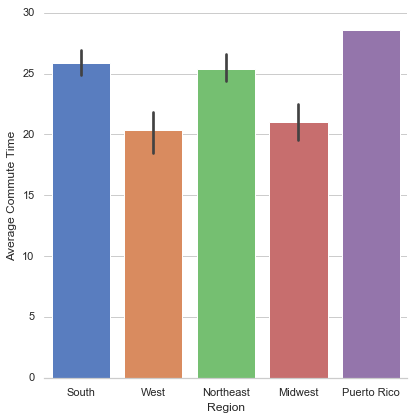

In [39]:
sns.set(style='whitegrid')

g = sns.catplot(x='Region', y='MeanCommute', data=state15,
               height=6, kind='bar', palette='muted')

g.despine(left=True)
g.set_ylabels('Average Commute Time')

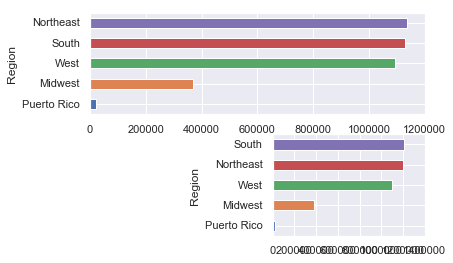

In [54]:
fig = plt.figure()
# Divide the figure into a 1x2 grid for the first section
ax1 = fig.add_subplot(2, 2, (1,2))

# Divide the figure into a 1x2 grid for the second section
ax2 = fig.add_subplot(224)

state15.groupby('Region')['Men'].sum().sort_values().plot(kind='barh', ax=ax1)
state15.groupby('Region')['Women'].sum().sort_values().plot(kind='barh', ax=ax2)

Text(0.5, 1.0, 'Population Average of Men per Region')

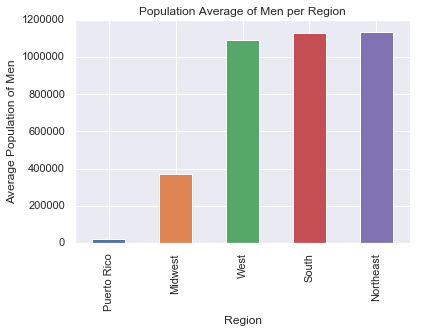

In [46]:
m.plot(kind='bar', grid=True)

plt.ylabel('Average Population of Men')
plt.title('Population Average of Men per Region')